In [1]:
celltype_to_corefiles = {
    'HepG2': {
        'valid_positive_set': '/users/eprakash/projects/benchmarking/newdata/HepG2/HepG2.summits.400bp.implanted.valid.bed.gz',
        'valid_negative_set': '/users/eprakash/projects/benchmarking/newdata/HepG2/no_HepG2_universal_dnase.matched.valid.bed.gz'
    },
    'A549': {
        'valid_positive_set': '/users/eprakash/projects/benchmarking/newdata/A549/A549.summits.400bp.implanted.train.bed.gz',
        'valid_negative_set': '/users/eprakash/projects/benchmarking/newdata/A549/no_A549_universal_dnase.matched.valid.bed.gz'
    },
    'H1ESC': {
        'valid_positive_set': '/users/eprakash/projects/benchmarking/newdata/H1ESC/H1ESC.summits.400bp.implanted.valid.bed.gz',
        'valid_negative_set': '/users/eprakash/projects/benchmarking/newdata/H1ESC/no_H1ESC_universal_dnase.matched.valid.bed.gz'
    },
    'K562': {
        'valid_positive_set': '/users/eprakash/projects/benchmarking/newdata/deepsea_K562/K562.pos.summits.valid.implanted.bed.gz',
        'valid_negative_set': '/users/eprakash/projects/benchmarking/newdata/deepsea_K562/K562.neg.summits.valid.implanted.bed.gz'
    }
}

On HepG2


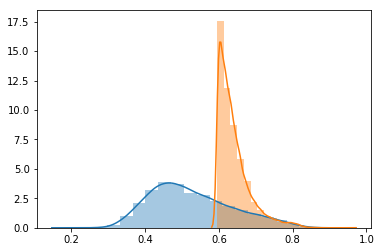

On A549


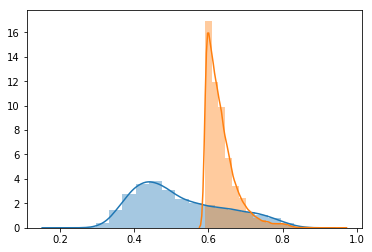

On H1ESC


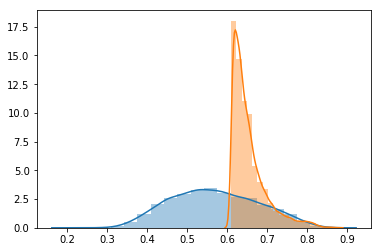

On K562


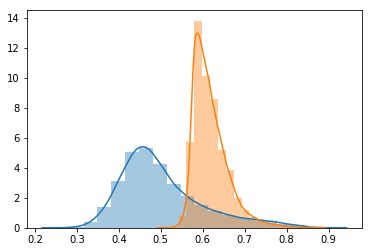

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import gzip
import numpy as np
import seaborn as sns

def onehot_encode(seqs):
    ltr = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], 'N': [0,0,0,0]}
    return np.array([[ltr[x] for x in seq.upper()] for seq in seqs])


def load_seqs_and_onehot(sequences_file):
    seqids = []
    seqs = []
    for line in gzip.open(sequences_file):
        seqid, seq = line.decode("utf-8").rstrip().split("\t")
        seqids.append(seqid)
        seqs.append(seq)
    onehotseqs = onehot_encode(seqs)
    return seqids, seqs, onehotseqs


for celltype in celltype_to_corefiles:
    print("On", celltype)
    corefiles = celltype_to_corefiles[celltype]
    positive_set = corefiles['valid_positive_set']
    negative_set = corefiles['valid_negative_set']
    posseqids, posseqs, pos_onehot_seqs = load_seqs_and_onehot(positive_set)
    negseqids, negseqs, neg_onehot_seqs = load_seqs_and_onehot(negative_set)
    
    pos_base_frequencies = np.mean(pos_onehot_seqs, axis=1)
    neg_base_frequencies = np.mean(neg_onehot_seqs, axis=1)
    
    sns.distplot(pos_base_frequencies[:,1]+pos_base_frequencies[:,2], bins=20)
    sns.distplot(neg_base_frequencies[:,1]+neg_base_frequencies[:,2], bins=20)
    plt.show()
    